<a href="https://colab.research.google.com/github/Data-Intelligence-Mastery/project-fault-segmentation/blob/master/01_fault_strike_dip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Calculate strike and dip of a fault

Here I will show how to calculate the strike and dip of fault using two different methods

Let's load the fault surface points data. Each surface point has (x,y,z) coordinates.

First, let's organize the fault data. Store the coordinates of each fault into a dictionary with the `Fault`. There are total 352 faults.

In [10]:
# Import and read data

import pandas as pd

path = 'https://raw.githubusercontent.com/Data-Intelligence-Mastery/project-fault-segmentation/master/data/fault_surfaces_points.csv'
fsp = pd.read_csv(path)
fsp.rename(columns={'Unnamed: 0': 'Row_NO'}, inplace=True) # Rename the Unnamed column

# Organize data
# Create a dictionary with Fault # as the dictionary key
import numpy as np
from tabulate import tabulate

fsp_uni = fsp.Fault.unique()

fsp_dict = dict()
for i in fsp_uni:
  fsp_dict[i] = fsp.loc[fsp['Fault']==i]
  temp = fsp_dict[i].copy()
  new_index = pd.DataFrame(temp.index)
  temp.loc[:,'Row_NO'] = range(len(temp)) # Reset the Row_NO to the number of rows for that single fault
  fsp_dict[i] = temp

print(tabulate(fsp_dict[0].iloc[0:6,:], headers='keys',tablefmt='psql'))

+----+----------+---------+----------+----------+----------+
|    |   Row_NO |   Fault |        X |        Y |        Z |
|----+----------+---------+----------+----------+----------|
|  0 |        0 |       0 | -5445    | -2207    | -2189.91 |
|  1 |        1 |       0 | -5626.55 | -1980.87 | -2332.94 |
|  2 |        2 |       0 | -4979.13 | -2099.14 | -2371.18 |
|  3 |        3 |       0 | -5547.04 | -1903.72 | -2410.13 |
|  4 |        4 |       0 | -4973.91 | -2116.28 | -2358.86 |
|  5 |        5 |       0 | -5763.28 | -2106.88 | -2213.04 |
+----+----------+---------+----------+----------+----------+


Let's visualize the first fault.

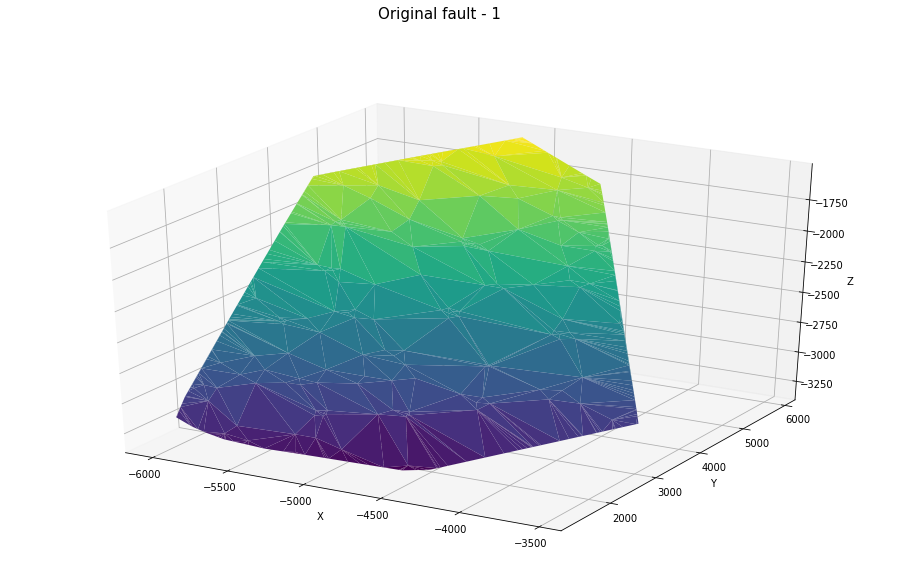

In [19]:
#%% Simple single fault visualization
import matplotlib.pyplot as plt
    
fault_ID = 1
fsp1 = np.array(fsp_dict[fault_ID])
X, Y, Z = fsp1[:, 2], fsp1[:, 3], fsp1[:, 4]

fig = plt.figure(figsize=(16,9))
title = 'Original fault - ' + str(fault_ID)
fig.suptitle(title,fontsize=15)
ax = fig.add_subplot(1, 1, 1, projection='3d')    
ax.plot_trisurf(X, Y, Z, cmap='viridis') # use triangular surface to plot xyz data
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('tight')
plt.show()
